# Import Library 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
%matplotlib inline
import plotly.graph_objects as go
import folium
import plotly.express as px
import pandas as pd
import re

# Import Data

In [2]:
df=pd.read_csv("../input/new-years-resolutions/new_year_resolutions_dataset.csv" , sep = ';')

In [3]:
df.head()

,resolution_topics,gender,name,resolution_category,retweet_count,text,tweet_coord,tweet_created,tweet_date,tweet_id,tweet_location,tweet_state,user_timezone,tweet_region
0,Eat healthier,female,Dena_Marina,Health & Fitness,0.0,"#NewYearsResolution :: Read more books, No scr...",NaN,2014-12-31T10:48:00,2014-12-31,"5,50363E+17",Southern California,CA,Pacific Time (US & Canada),West
1,Humor about Personal Growth and Interests Reso...,female,ninjagirl325,Humor,1.0,#NewYearsResolution Finally master @ZJ10 's pa...,NaN,2014-12-31T10:47:00,2014-12-31,"5,50363E+17",New Jersey,NJ,Central Time (US & Canada),Northeast
2,Be More Confident,male,RickyDelReyy,Personal Growth,0.0,#NewYearsResolution to stop being so damn perf...,NaN,2014-12-31T10:46:00,2014-12-31,"5,50362E+17",Hollywood,CA,Eastern Time (US & Canada),West
3,Other,male,CalmareNJ,Philanthropic,0.0,My #NewYearsResolution is to help my disabled ...,NaN,2014-12-31T10:45:00,2014-12-31,"5,50362E+17",Metro NYC,NY,NaN,Northeast
4,Be more positive,female,welovatoyoudemi,Personal Growth,0.0,#NewYearsResolution #2015Goals #2015bucketlist...,NaN,2014-12-31T10:44:00,2014-12-31,"5,50362E+17","Pittsburgh, Pennsylvania",PA,Eastern Time (US & Canada),Northeast


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   resolution_topics    5002 non-null   object 
 1   gender               5002 non-null   object 
 2   name                 5002 non-null   object 
 3   resolution_category  5002 non-null   object 
 4   retweet_count        3136 non-null   float64
 5   text                 5002 non-null   object 
 6   tweet_coord          227 non-null    object 
 7   tweet_created        5002 non-null   object 
 8   tweet_date           5002 non-null   object 
 9   tweet_id             5002 non-null   object 
 10  tweet_location       5002 non-null   object 
 11  tweet_state          5002 non-null   object 
 12  user_timezone        3703 non-null   object 
 13  tweet_region         5002 non-null   object 
dtypes: float64(1), object(13)
memory usage: 547.2+ KB


In [5]:
df.isna().sum()

resolution_topics         0
gender                    0
name                      0
resolution_category       0
retweet_count          1866
text                      0
tweet_coord            4775
tweet_created             0
tweet_date                0
tweet_id                  0
tweet_location            0
tweet_state               0
user_timezone          1299
tweet_region              0
dtype: int64

In [6]:
df.describe()

,retweet_count
count,3136.000000
mean,4.486607
std,90.242702
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,4234.000000


In [7]:
df.sort_values(by="retweet_count",ascending= False).head(1)

,resolution_topics,gender,name,resolution_category,retweet_count,text,tweet_coord,tweet_created,tweet_date,tweet_id,tweet_location,tweet_state,user_timezone,tweet_region
2275,Save money,female,brianagamino34,Finance,4234.0,RT @TweetLikeAGirI: my only New Years resoluti...,NaN,2015-01-01T12:20:00,2015-01-01,"5,50749E+17","Buda, Texas",TX,NaN,South


This tweet trend

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

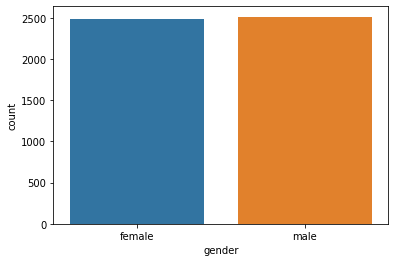

In [8]:
sns.countplot(df['gender'])

In [9]:
df['tweet_location'].value_counts().head(10)

Los Angeles        63
New York           61
Los Angeles, CA    52
Texas              50
California         42
Chicago            42
NYC                42
New York City      38
Florida            36
Ohio               32
Name: tweet_location, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


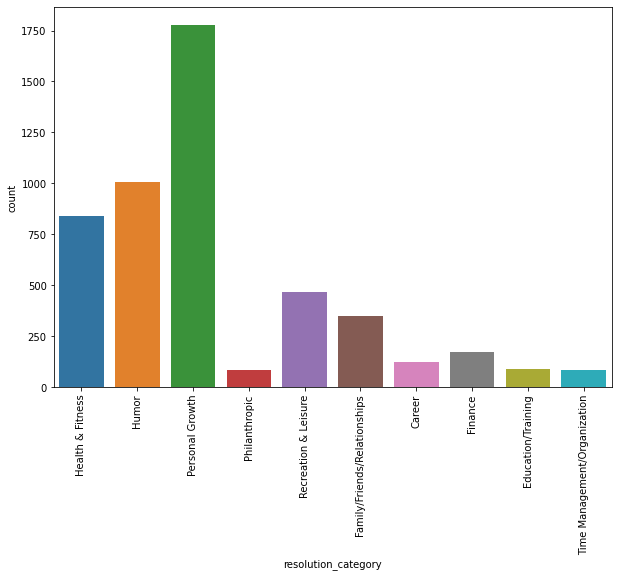

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(df['resolution_category'])
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


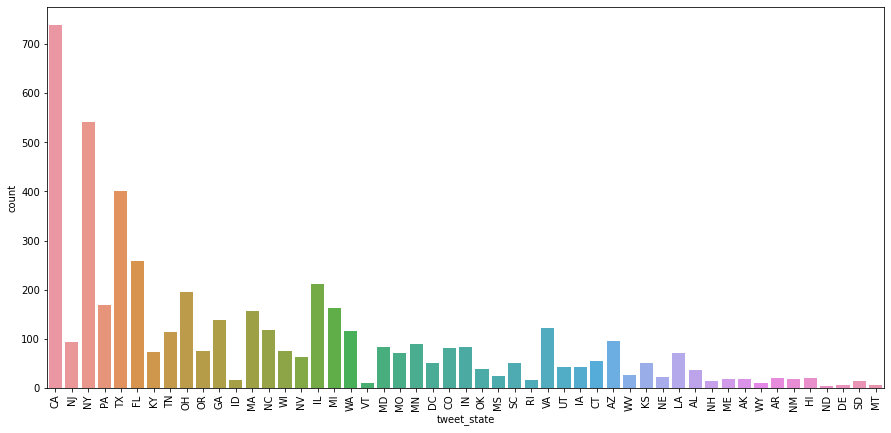

In [11]:
plt.figure(figsize=(15,7))
sns.countplot(df['tweet_state'])
plt.xticks(rotation=90)
plt.show()


In [12]:
df['tweet_date']=pd.to_datetime(df['tweet_date'])

In [13]:
plt.figure(figsize=(30,7))

px.scatter(df,x="tweet_state",y="retweet_count",animation_frame="gender")

<Figure size 2160x504 with 0 Axes>

In [14]:
from wordcloud import WordCloud, STOPWORDS

# Now visualization the word in the tweet

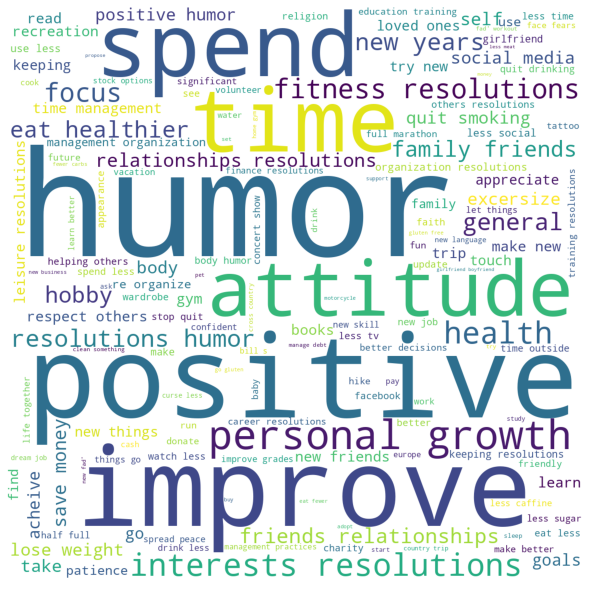

In [15]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.resolution_topics:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

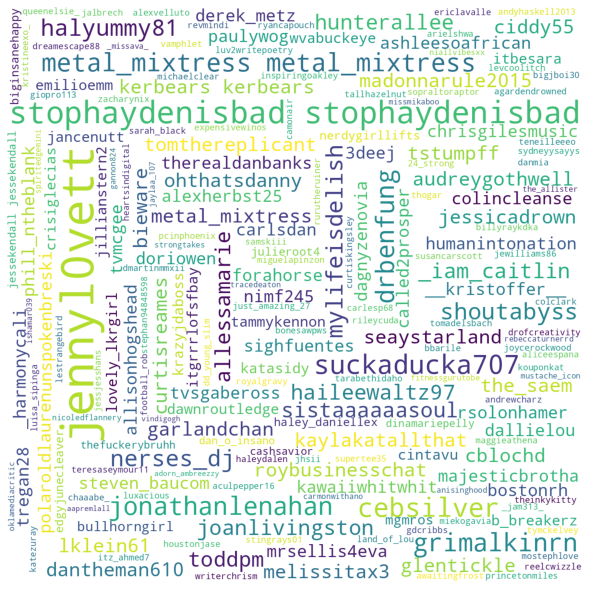

In [16]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.name:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

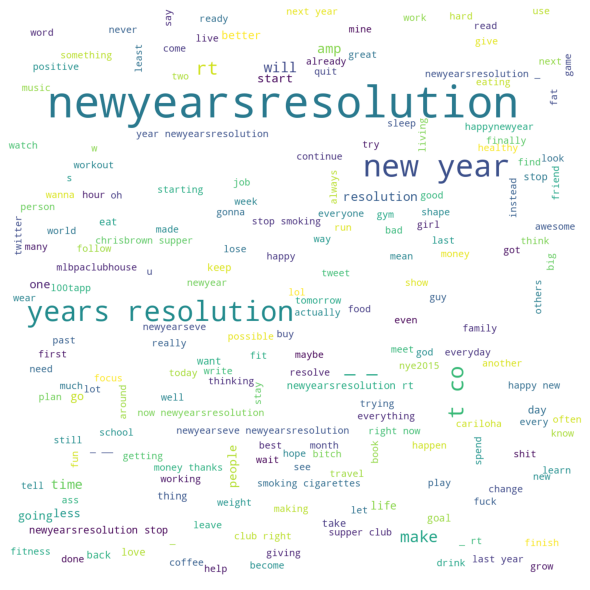

In [17]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()